# Análisis Exploratorio de Datos - Bitcoin

Este notebook contiene el análisis exploratorio de datos (EDA) para el precio del Bitcoin (BTC-USD). 

## Objetivo
Explorar y entender los patrones en los datos históricos de Bitcoin para preparar el análisis y modelado posterior.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [2]:
pd.set_option('display.max_columns', None)
plt.style.use("ggplot")


## 1. Carga de Datos

Descargamos los datos históricos de Bitcoin desde Yahoo Finance para el período 2020-2025.


In [1]:
from datetime import datetime

today = datetime.today().strftime('%Y-%m-%d')
df = yf.download("BTC-USD", start="2020-01-01", end=today, interval="1d")


NameError: name 'yf' is not defined

In [4]:
df.to_csv("../data_raw/btc_usd_raw.csv")


## 2. Exploración Inicial

Vamos a examinar la estructura y características básicas de los datos.


In [5]:
print("Primeras 5 filas:")
print(df.head())


Primeras 5 filas:
Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095


In [6]:
print("Información del DataFrame:")
print(df.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2094 entries, 2020-01-01 to 2025-09-24
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   2094 non-null   float64
 1   (High, BTC-USD)    2094 non-null   float64
 2   (Low, BTC-USD)     2094 non-null   float64
 3   (Open, BTC-USD)    2094 non-null   float64
 4   (Volume, BTC-USD)  2094 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 98.2 KB
None


In [7]:
print("Estadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
Price           Close           High            Low           Open  \
Ticker        BTC-USD        BTC-USD        BTC-USD        BTC-USD   
count     2094.000000    2094.000000    2094.000000    2094.000000   
mean     44699.414298   45544.852940   43721.531208   44650.773984   
std      29788.828728   30229.313832   29282.551343   29762.897927   
min       4970.788086    5331.833984    4106.980957    5002.578125   
25%      21200.651367   21605.637695   20776.990234   21180.635742   
50%      38057.771484   39273.462891   36937.169922   37990.091797   
75%      61588.659180   63115.498047   60311.201172   61554.688477   
max     123344.062500  124457.117188  118959.195312  123339.398438   

Price         Volume  
Ticker       BTC-USD  
count   2.094000e+03  
mean    3.525449e+10  
std     2.062634e+10  
min     5.331173e+09  
25%     2.150386e+10  
50%     3.127002e+10  
75%     4.365673e+10  
max     3.509679e+11  


In [8]:
print("Valores faltantes por columna:")
print(df.isna().sum())


Valores faltantes por columna:
Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64


## 3. Visualizaciones

### 3.1 Evolución del Precio de Cierre


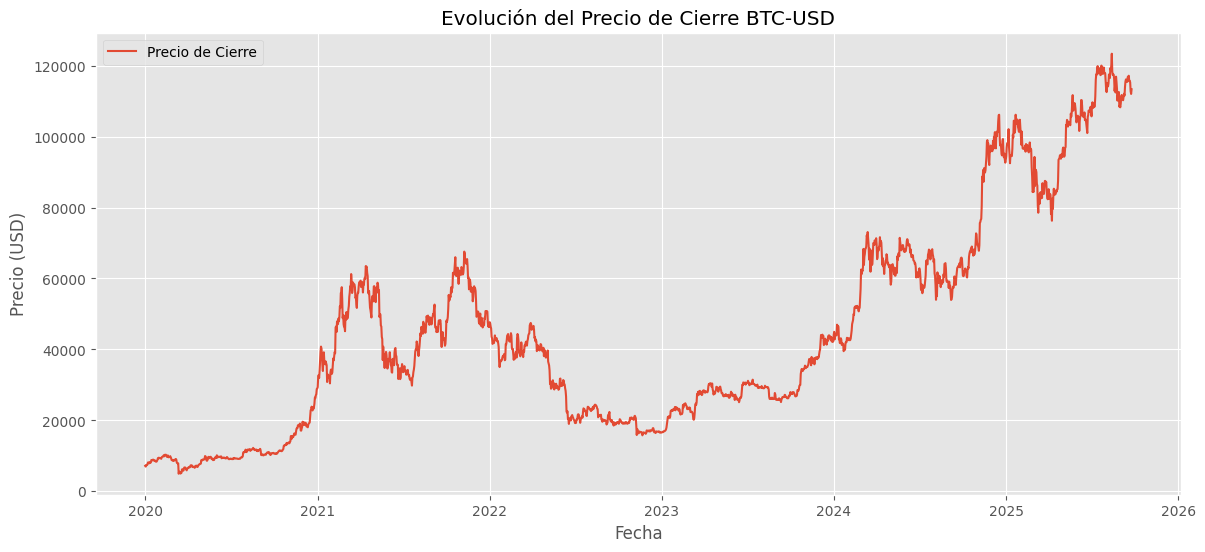

In [15]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df["Close"], label="Precio de Cierre")
plt.title("Evolución del Precio de Cierre BTC-USD")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()


### 3.2 Cálculo de Retornos Logarítmicos


In [16]:
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))


### 3.3 Visualización de Retornos Logarítmicos


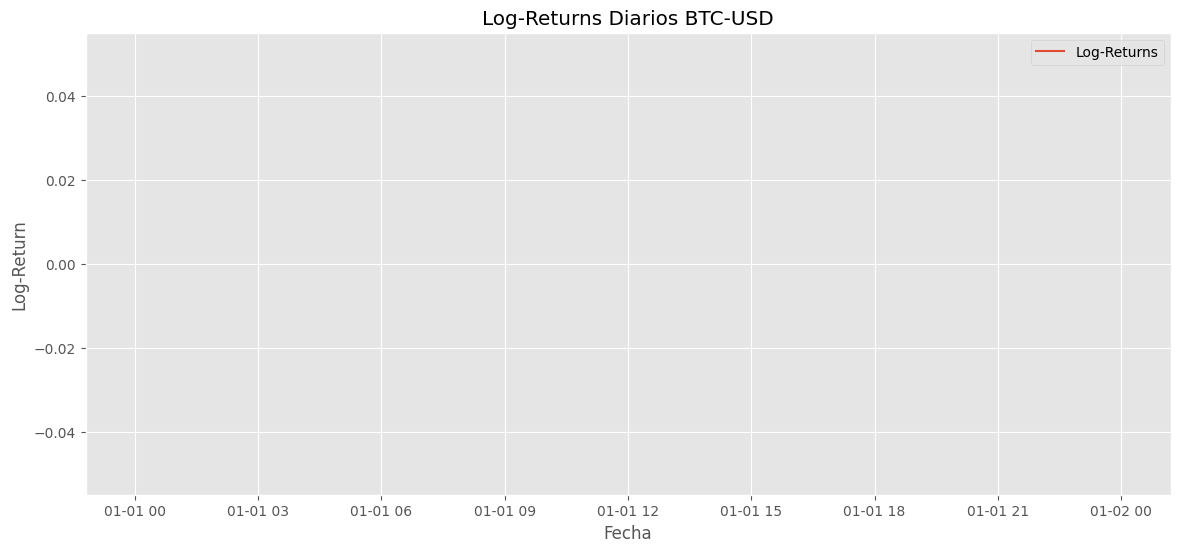

In [17]:
plt.figure(figsize=(14,6))
plt.plot(df.index, df["log_return"], label="Log-Returns")
plt.title("Log-Returns Diarios BTC-USD")
plt.xlabel("Fecha")
plt.ylabel("Log-Return")
plt.legend()
plt.show()


### 3.4 Distribución de Retornos


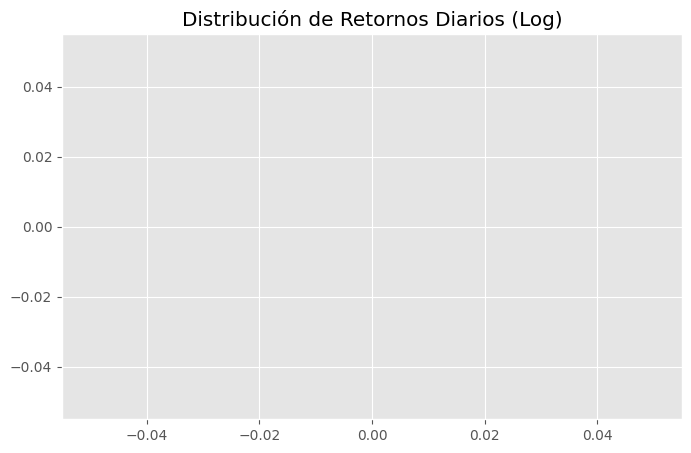

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df["log_return"].dropna(), bins=100, kde=True)
plt.title("Distribución de Retornos Diarios (Log)")
plt.show()


### 3.5 Matriz de Correlación


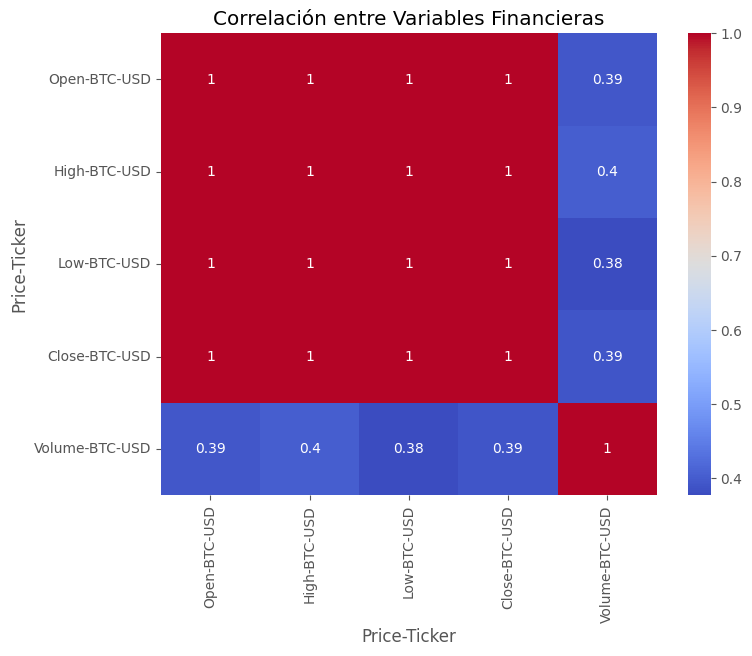

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Open","High","Low","Close","Volume"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlación entre Variables Financieras")
plt.show()


## 4. Limpieza y Preprocesamiento de Datos

### 4.1 Verificación de la estructura de columnas


In [20]:

print("Columnas actuales:")
print(df.columns.tolist())

Columnas actuales:
[('Close', 'BTC-USD'), ('High', 'BTC-USD'), ('Low', 'BTC-USD'), ('Open', 'BTC-USD'), ('Volume', 'BTC-USD'), ('log_return', '')]


### 4.2 Corrección de MultiIndex en columnas


In [21]:
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]


### 4.3 Preparación de datos para análisis


In [22]:
df_clean = df.copy()


### 4.4 Conversión de columnas a numérico


In [23]:
for col in ['Open','High','Low','Close','Volume']:
    df_clean.loc[:, col] = pd.to_numeric(df_clean[col], errors='coerce')


### 4.5 Eliminación de filas con valores faltantes


In [24]:
df_clean = df_clean.dropna(subset=['Open','High','Low','Close','Volume'])


### 4.6 Verificación de duplicados


In [25]:
print("Duplicados:", df_clean.duplicated().sum())


Duplicados: 0


### 4.7 Verificación de valores negativos


In [26]:
print("Precios negativos:")
print((df_clean[['Open','High','Low','Close']] < 0).sum())
print("Volumen negativo:", (df_clean['Volume'] < 0).sum())


Precios negativos:
Open     0
High     0
Low      0
Close    0
dtype: int64
Volumen negativo: 0


### 4.8 Estadísticas descriptivas de datos limpios


In [27]:
print("Estadísticas descriptivas:")
print(df_clean.describe())


Estadísticas descriptivas:
               Close           High            Low           Open  \
count    2094.000000    2094.000000    2094.000000    2094.000000   
mean    44699.414298   45544.852940   43721.531208   44650.773984   
std     29788.828728   30229.313832   29282.551343   29762.897927   
min      4970.788086    5331.833984    4106.980957    5002.578125   
25%     21200.651367   21605.637695   20776.990234   21180.635742   
50%     38057.771484   39273.462891   36937.169922   37990.091797   
75%     61588.659180   63115.498047   60311.201172   61554.688477   
max    123344.062500  124457.117188  118959.195312  123339.398438   

             Volume  log_return  
count  2.094000e+03         0.0  
mean   3.525449e+10         NaN  
std    2.062634e+10         NaN  
min    5.331173e+09         NaN  
25%    2.150386e+10         NaN  
50%    3.127002e+10         NaN  
75%    4.365673e+10         NaN  
max    3.509679e+11         NaN  


### 4.9 Cálculo de retornos logarítmicos en datos limpios


In [28]:
df_clean['log_return'] = np.log(df_clean['Close'] / df_clean['Close'].shift(1))


## 5. Análisis de Correlación y Redundancia

### 5.1 Detección de columnas redundantes


In [29]:
corr_matrix = df_clean[['Open','High','Low','Close','Volume']].corr()

redundant_cols = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) == 1:
            redundant_cols.append(corr_matrix.columns[i])

print("Columnas redundantes a eliminar:", redundant_cols)


Columnas redundantes a eliminar: []


In [30]:
df_clean.drop(columns=redundant_cols, inplace=True)


### 5.2 Eliminación final de duplicados


In [31]:
print("Duplicados antes de eliminar:", df_clean.duplicated().sum())
df_clean = df_clean.drop_duplicates()
print("Duplicados después de eliminar:", df_clean.duplicated().sum())


Duplicados antes de eliminar: 0
Duplicados después de eliminar: 0


## 6. Detección de Outliers

### 6.1 Función para detectar outliers usando IQR


In [32]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]


### 6.2 Detección de outliers por columna


In [33]:
for col in ['Open','High','Low','Close','Volume']:
    outliers = detect_outliers_iqr(df_clean, col)
    print(f"{col}: {len(outliers)} outliers detectados")


Open: 1 outliers detectados
High: 0 outliers detectados
Low: 0 outliers detectados
Close: 1 outliers detectados
Volume: 81 outliers detectados


## 7. Tratamiento de Outliers

### 7.1 Winsorizing - Limitación de valores extremos


In [34]:
cols_to_winsor = ['Open', 'High', 'Low', 'Close', 'Volume']
lower_percentile = 0.01
upper_percentile = 0.99

df_winsor = df_clean.copy()


In [35]:
for col in cols_to_winsor:
    lower = df_winsor[col].quantile(lower_percentile)
    upper = df_winsor[col].quantile(upper_percentile)
    df_winsor[col] = df_winsor[col].clip(lower, upper)
    print(f"{col}: recortado a [{lower:.2f}, {upper:.2f}]")


Open: recortado a [6737.05, 117538.70]
High: recortado a [6891.87, 118857.08]
Low: recortado a [6588.48, 116552.53]
Close: recortado a [6732.20, 117525.31]
Volume: recortado a [7903063466.85, 104059049557.31]


### 7.2 Verificación de estadísticas tras winsorizing


In [36]:
print("Estadísticas tras winsorizing:")
print(df_winsor.describe())


Estadísticas tras winsorizing:
               Close           High            Low           Open  \
count    2094.000000    2094.000000    2094.000000    2094.000000   
mean    44693.384852   45534.564641   43721.607568   44644.876458   
std     29745.243721   30181.162816   29247.591386   29719.543999   
min      6732.200933    6891.874429    6588.480796    6737.053257   
25%     21200.651367   21605.637695   20776.990234   21180.635742   
50%     38057.771484   39273.462891   36937.169922   37990.091797   
75%     61588.659180   63115.498047   60311.201172   61554.688477   
max    117525.314531  118857.075391  116552.531406  117538.700234   

             Volume   log_return  
count  2.094000e+03  2093.000000  
mean   3.499271e+10     0.001317  
std    1.877740e+10     0.032777  
min    7.903063e+09    -0.464730  
25%    2.150386e+10    -0.012500  
50%    3.127002e+10     0.000621  
75%    4.365673e+10     0.015234  
max    1.040590e+11     0.171821  


## 8. Escalado de Datos

### 8.1 Preparación del escalador robusto


In [37]:
from sklearn.preprocessing import RobustScaler

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
scaler = RobustScaler()


### 8.2 Aplicación del escalado


In [38]:
X_scaled = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(X_scaled, columns=numeric_cols, index=df.index)


### 8.3 Verificación de datos escalados


In [39]:
print("Shape después del escalado:", df_scaled.shape)
print("Primeras 5 filas de datos escalados:")
print(df_scaled.head())


Shape después del escalado: (2094, 5)
Primeras 5 filas de datos escalados:
                Open      High       Low     Close    Volume
Date                                                        
2020-01-01 -0.762747 -0.771362 -0.752822 -0.764029 -0.573486
2020-01-02 -0.762558 -0.772378 -0.758885 -0.769345 -0.472532
2020-01-03 -0.767960 -0.767522 -0.759397 -0.760446 -0.142579
2020-01-04 -0.759020 -0.767193 -0.749418 -0.758817 -0.578966
2020-01-05 -0.757408 -0.764372 -0.747116 -0.758801 -0.521149


## 9. Resumen del Análisis

### Conclusiones del EDA

1. **Datos cargados**: Se descargaron exitosamente los datos históricos de Bitcoin desde Yahoo Finance
2. **Calidad de datos**: No se encontraron valores faltantes significativos ni valores negativos
3. **Outliers**: Se detectaron outliers principalmente en el volumen de transacciones
4. **Tratamiento**: Se aplicó winsorizing para limitar valores extremos
5. **Escalado**: Los datos fueron escalados usando RobustScaler para preparar el modelado

### Próximos pasos
- Ingeniería de características adicionales
- Selección de variables
- Modelado predictivo
